# Assignment8

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [82]:
df = pd.read_csv("car_data.csv")

In [83]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [85]:
df.head(3)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0


In [86]:
import seaborn as sns

C:\Users\wiki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

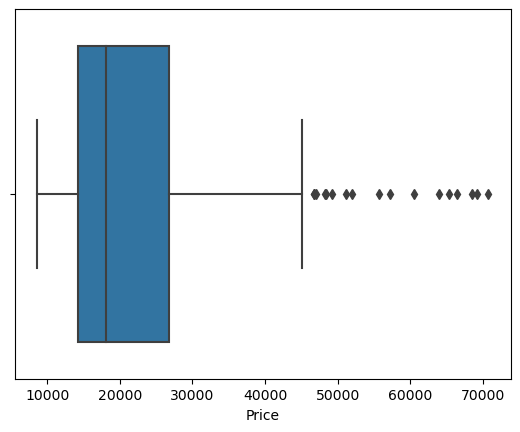

In [87]:
sns.boxplot(df.Price)

### Task 1
1.Find the linear regression equation for mileage vs price.

In [88]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)

In [89]:
low_out = (df['Price'] < lower_limit)
upp_out = (df['Price'] > upper_limit)

In [90]:
df = df[~(low_out | upp_out)]

C:\Users\wiki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

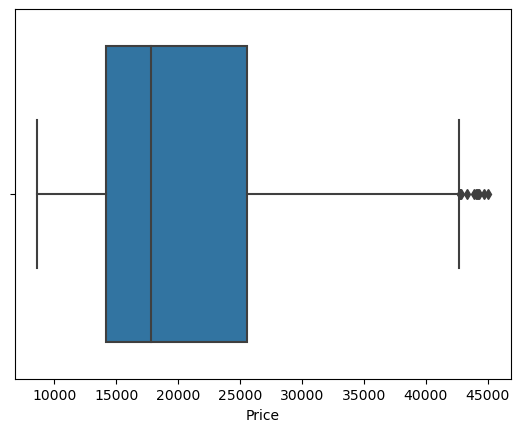

In [91]:
sns.boxplot(df.Price)

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [93]:
lr = LinearRegression()

In [94]:
X = df[['Mileage']]
y = df[['Price']]

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [96]:
lr.fit(X_train, y_train)

LinearRegression()

In [97]:
print('The linear regression equation for mileage vs price is :')
print('y =',lr.coef_,'* x +',lr.intercept_)

The linear regression equation for mileage vs price is :
y = [[-0.0739696]] * x + [22104.90867938]


### Task 1
2. Chart the original data and the equation on the chart.

In [98]:
y_pred = lr.predict(X_test)

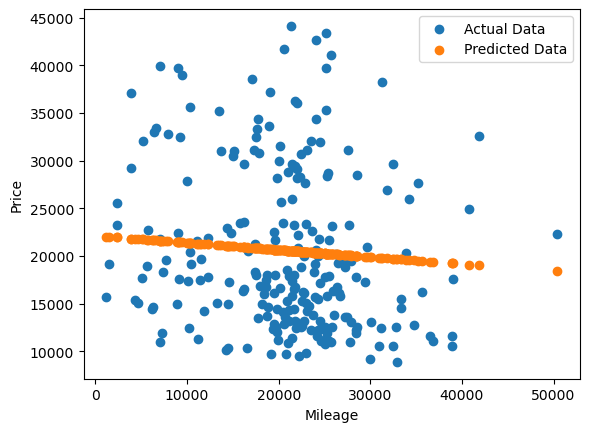

In [99]:
plt.scatter(X_test, y_test, label = 'Actual Data')
plt.scatter(X_test, y_pred, label = 'Predicted Data')
plt.legend()
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

### Task 1
3. Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [100]:
from sklearn.metrics import r2_score

In [101]:
print('The R2 Score for the equation is {}'.format(r2_score(y_test, y_pred)))

The R2 Score for the equation is 0.017645988046412042


### Task 2
1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [102]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [103]:
X = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
y = df[['Price']]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [105]:
lr = LinearRegression()

In [106]:
lr.fit(X_train, y_train)

LinearRegression()

In [107]:
print('The linear regression equation for [Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather] vs price is :')
print('y =',lr.coef_,'* x +',lr.intercept_)

The linear regression equation for [Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather] vs price is :
y = [[-1.27770733e-01  1.43288379e+03  1.34403597e+03 -5.54818730e+02
   6.07549383e+03 -2.52768316e+03  2.52421342e+03]] * x + [8888.16869335]


### Task 2
2. Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [108]:
y_pred = lr.predict(X_test)

In [109]:
print('The R2 Score for the equation is {}'.format(r2_score(y_test, y_pred)))

The R2 Score for the equation is 0.42221806790023086


### Task 2
3. Find the combination of the factors that is the best predictor for price.

In [110]:
cols = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']

In [111]:
def combination_scores(cols, df, target):
    X = df[cols]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    return r2_score(y_test, y_pred)

In [112]:
import itertools as it

In [113]:
scores = {}
for i in range(len(cols)):
    for j in it.combinations(cols, i + 1):
        scores[combination_scores(list(j), df, target = 'Price')] = list(j)

In [114]:
sorted(scores.items(), key = lambda c:c[0], reverse = True)

[(0.4283191447825191, ['Mileage', 'Liter', 'Cruise', 'Sound', 'Leather']),
 (0.427667167652503,
  ['Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']),
 (0.4246897728122875,
  ['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather']),
 (0.42221806790023086,
  ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']),
 (0.4140575948661439,
  ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']),
 (0.4134413465533444, ['Mileage', 'Cylinder', 'Cruise', 'Sound', 'Leather']),
 (0.4122891061923377, ['Liter', 'Cruise', 'Sound', 'Leather']),
 (0.41153392768725217, ['Liter', 'Doors', 'Cruise', 'Sound', 'Leather']),
 (0.40866104569682116, ['Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather']),
 (0.40607801684695843,
  ['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']),
 (0.40596738751626016, ['Mileage', 'Liter', 'Cruise', 'Leather']),
 (0.4045586400956741, ['Mileage', 'Liter', 'Doors', 'Cruise', 'Leather']),
 (0.4026442439940444, ['Mileage', 'Cylin

#### The best R2 score is 0.4283191447825191 with this combination  ['Mileage', 'Liter', 'Cruise', 'Sound', 'Leather']

### Task 3
1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [115]:
from sklearn.dummy import DummyRegressor

In [130]:
def dummy_scores(cols, df, target):
    X = df[cols]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
    dr = DummyRegressor(strategy="median")
    dr.fit(X_train, y_train)
    y_pred = dr.predict(X_test)
    return r2_score(y_test, y_pred)

In [126]:
cols =['Make', 'Model', 'Type']

In [147]:
scores_dummy = {}
for i in range(len(cols)):
    for j in it.combinations(cols, i + 1):
        key = list(j)
        scores_dummy[j] = dummy_scores(list(j), df, target = 'Price')

In [148]:
scores_dummy

{('Make',): -0.08500006419129469,
 ('Model',): -0.08500006419129469,
 ('Type',): -0.08500006419129469,
 ('Make', 'Model'): -0.08500006419129469,
 ('Make', 'Type'): -0.08500006419129469,
 ('Model', 'Type'): -0.08500006419129469,
 ('Make', 'Model', 'Type'): -0.08500006419129469}